In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



c:\Users\ma3\anaconda3\envs\python_learn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

df_DA_US = df_DA_US.dropna(subset="salary_year_avg")
df_DA_US_exploded = df_DA_US.explode('job_skills')

In [8]:
df_pivot = df_DA_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

In [17]:
df_pivot = df_pivot.rename(columns={"count":"skill_count", "median":"median_salary"})

DA_job_counts = len(df_DA_US)

skill_percent = 5

df_pivot["skill_percent"] = df_pivot["skill_count"] / DA_job_counts *100

df_pivot = df_pivot[df_pivot["skill_percent"] > skill_percent]

In [18]:
df_pivot

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


C:\Users\ma3\AppData\Local\Temp\ipykernel_19148\4172371227.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(df_pivot["skill_percent"][i], df_pivot["median_salary"][i], df_pivot.index[i]))


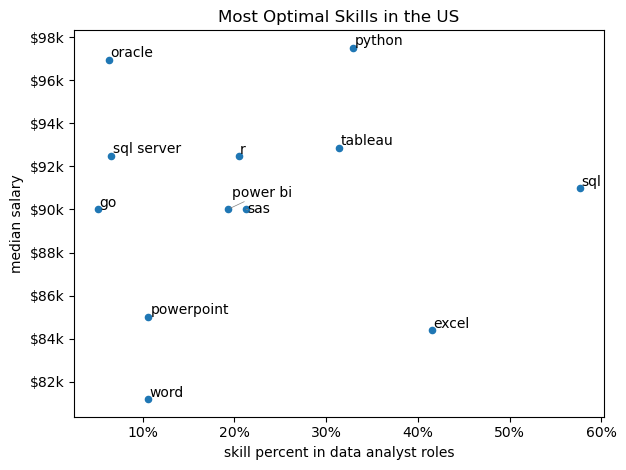

In [26]:
from adjustText import adjust_text

df_pivot.plot(kind="scatter", x="skill_percent", y="median_salary")
plt.xlabel("skill percent in data analyst roles")
plt.ylabel("median salary")
plt.title("Most Optimal Skills in the US")
plt.tight_layout()

texts = []

for i in range(len(df_pivot)):
    texts.append(plt.text(df_pivot["skill_percent"][i], df_pivot["median_salary"][i], df_pivot.index[i]))


adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter())

plt.show()

In [32]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['nuix',
  'esquisse',
  'qlik',
  'looker',
  'splunk',
  'sharepoint',
  'alteryx',
  'tableau',
  'ssis',
  'cognos',
  'datarobot',
  'ms access',
  'excel',
  'msaccess',
  'power bi',
  'spss',
  'outlook',
  'powerpoint',
  'spreadsheet',
  'word',
  'sheets',
  'powerbi',
  'ssrs',
  'dax',
  'sap',
  'microstrategy',
  'visio',
  'sas'],
 'programming': ['crystal',
  'swift',
  'scala',
  'kotlin',
  'javascript',
  'go',
  'dart',
  'delphi',
  'assembly',
  'powershell',
  'html',
  'objective-c',
  'sass',
  'visual basic',
  'mongodb',
  'c',
  'golang',
  'vb.net',
  'c#',
  'lua',
  'rust',
  'lisp',
  'pascal',
  'matlab',
  'shell',
  'perl',
  'ruby',
  'f#',
  'julia',
  'solidity',
  'css',
  'no-sql',
  'php',
  'cobol',
  'nosql',
  'groovy',
  'visualbasic',
  'python',
  'typescript',
  'fortran',
  'mongo',
  'apl',
  'clojure',
  'elixir',
  'ocaml',
  'vba',
  'erlang',
  'c++',
  'sql',
  'r',
  'java',
  't-sql',
  'bash',
  'haskell',
  '

In [33]:
df_technology =pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,nuix
0,analyst_tools,esquisse
0,analyst_tools,qlik
0,analyst_tools,looker
0,analyst_tools,splunk
...,...,...
9,sync,wire
9,sync,zoom
9,sync,twilio
9,sync,mattermost


In [37]:
df_plot = df_pivot.merge(df_technology, left_on="job_skills", right_on="skills")

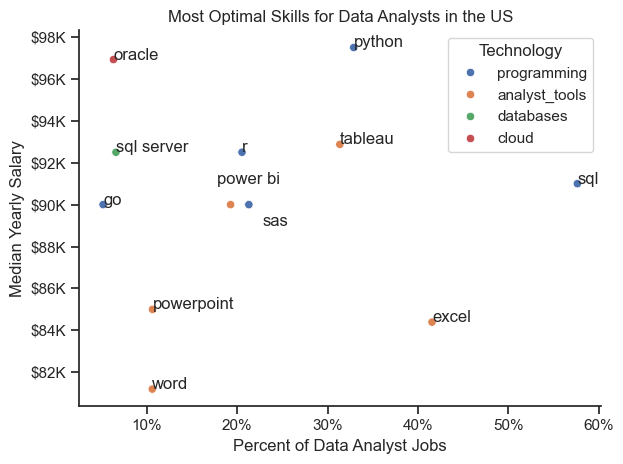

In [52]:
#Ploting the Data
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.despine()
sns.set_theme(style='ticks')

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')


#Fromating the x and y axises
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


# Adjust text to avoid overlap
for i, txt in enumerate(df_pivot.index):
    x = df_pivot['skill_percent'].iloc[i]
    y = df_pivot['median_salary'].iloc[i]

    if txt == "power bi":
        plt.text(x - 1.5, y + 1000, txt)  # shift left and up
    elif txt == "sas":
        plt.text(x + 1.5, y - 1000, txt)  # shift right and down
    else:
        plt.text(x, y, txt)


# Adjust layout and display plot 
plt.tight_layout()
plt.show()